In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

In [21]:
pytorch_checkpoint_dir = "./torch_checkpoints/lenet_cifar10_causalpruner_10_0_2_1e-06"
pytorch_zscale_checkpoint_dir = "./torch_zscale_checkpoints/lenet_cifar10_causalpruner_10_0_2_1e-06"
sklearn_checkpoint_dir = "./sklearn_checkpoints/lenet_cifar10_causalpruner_10_0_2_1e-06"
sklearn_zscale_checkpoint_dir = "./sklearn_zscale_checkpoints/lenet_cifar10_causalpruner_10_0_2_1e-06"


In [22]:
def load_checkpoint(checkpoint_path):
    return torch.load(checkpoint_path, map_location=torch.device("cpu"), weights_only= True)

In [45]:
pytorch_init_model = load_checkpoint(os.path.join(pytorch_checkpoint_dir, "init.ckpt"))
pytorch_final_model = load_checkpoint(os.path.join(pytorch_checkpoint_dir, "model.trained.ckpt"))

sklearn_init_model = load_checkpoint(os.path.join(sklearn_checkpoint_dir, "init.ckpt"))
sklearn_final_model = load_checkpoint(os.path.join(sklearn_checkpoint_dir, "model.trained.ckpt"))


In [46]:
def extract_weights(model_dict):
    return {k: v.numpy() for k, v in model_dict.items() if "_mask" in k}

In [47]:
pytorch_final_weights = extract_weights(pytorch_final_model['model'])
sklearn_final_weights = extract_weights(sklearn_final_model['model'])

#skearn_init_weights = sklearn_init_model["coef_"]
#sklearn_final_weights = sklearn_final_model["coef_"]

In [48]:
def plot_result(weight_mask, layer, torch_or_sk="PyTorch"):
    plt.figure(figsize=(10,5))
    plt.hist(weight_mask[f"{layer}"].flatten(), bins=50, alpha=0.5, label=f"{torch_or_sk} Pruned")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title(f"Comparison of Pruned Weights ({torch_or_sk}): {layer}")
    plt.show()

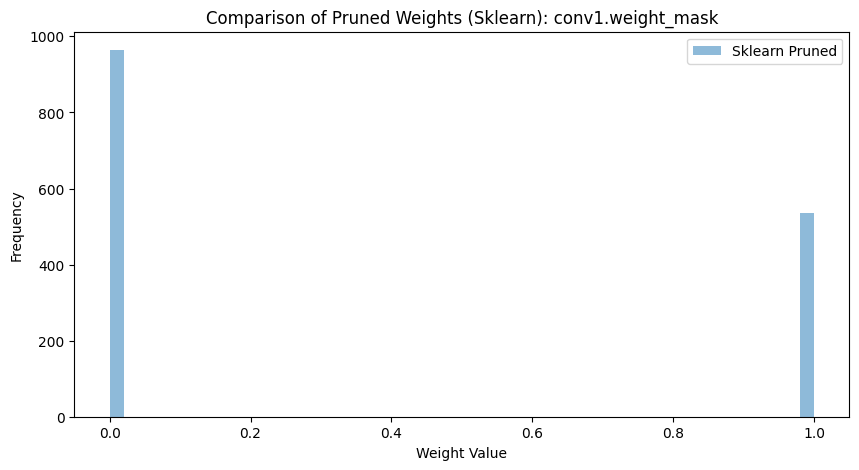

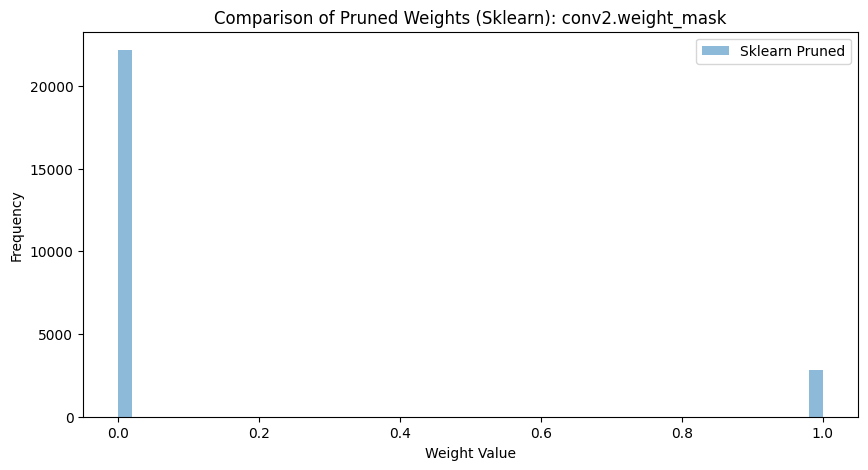

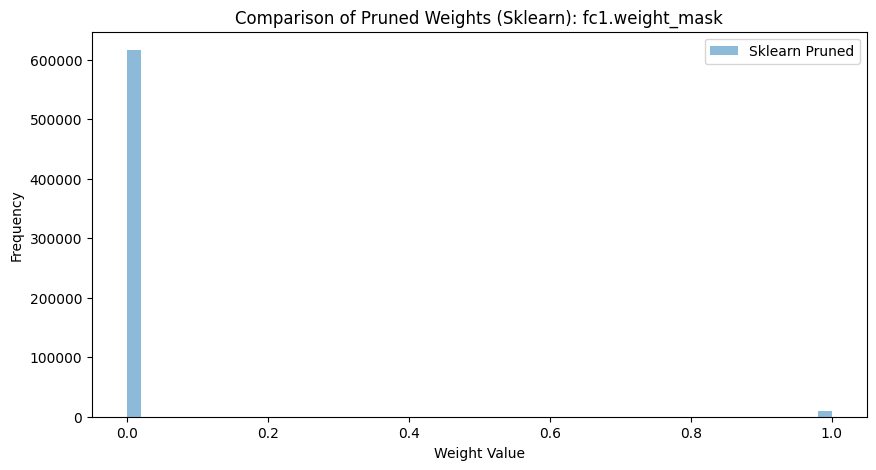

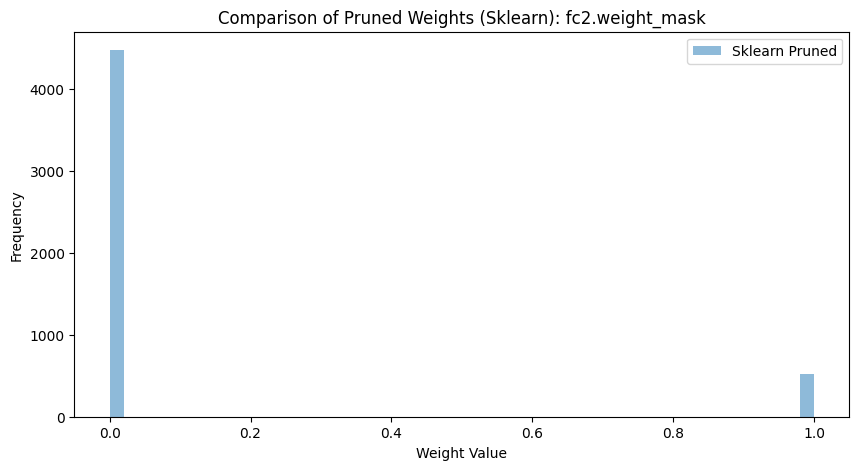

In [49]:
for keys in sklearn_final_weights.keys(): 
    plot_result(sklearn_final_weights, keys, "Sklearn")

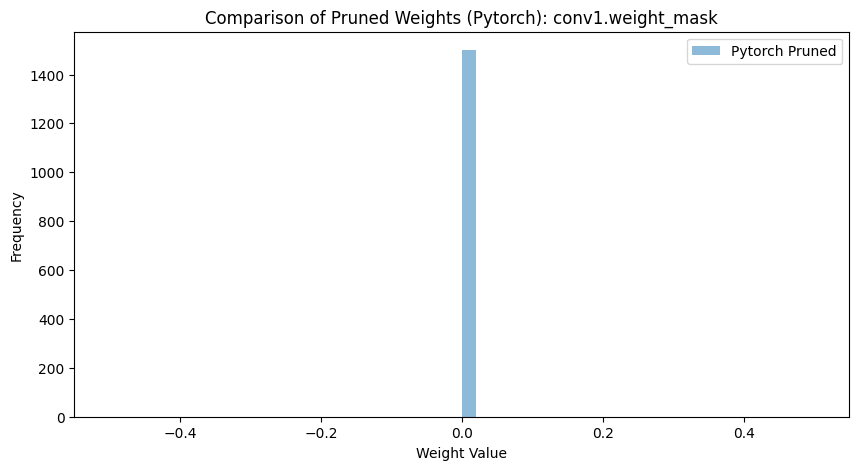

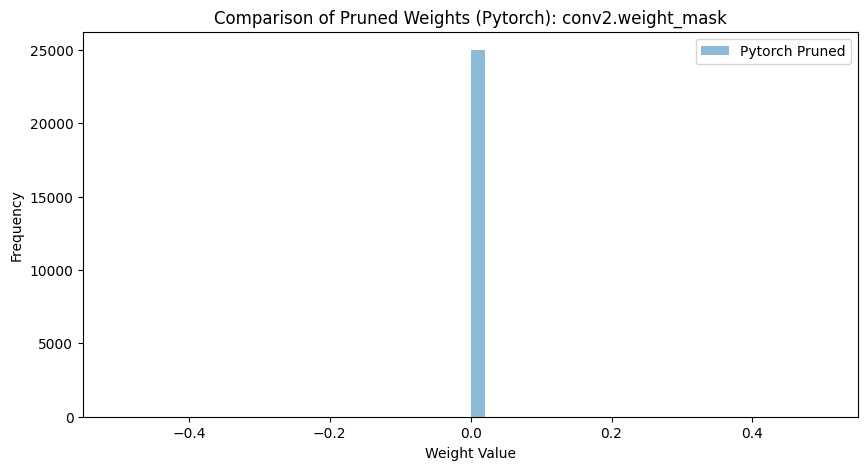

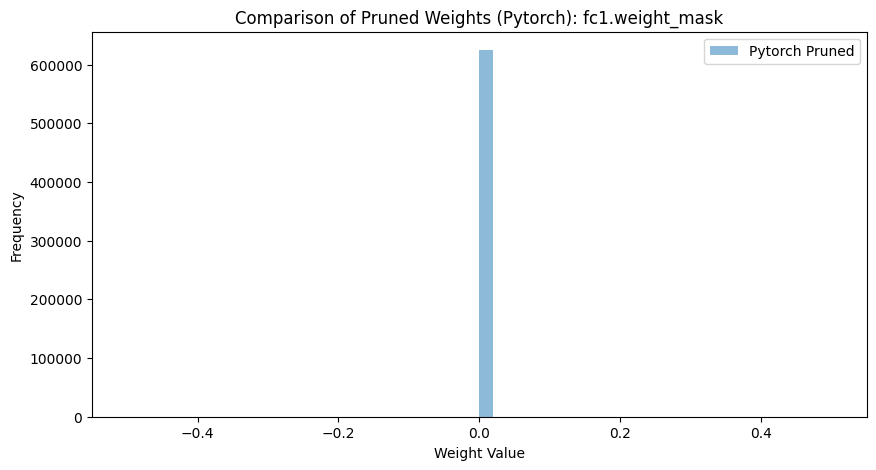

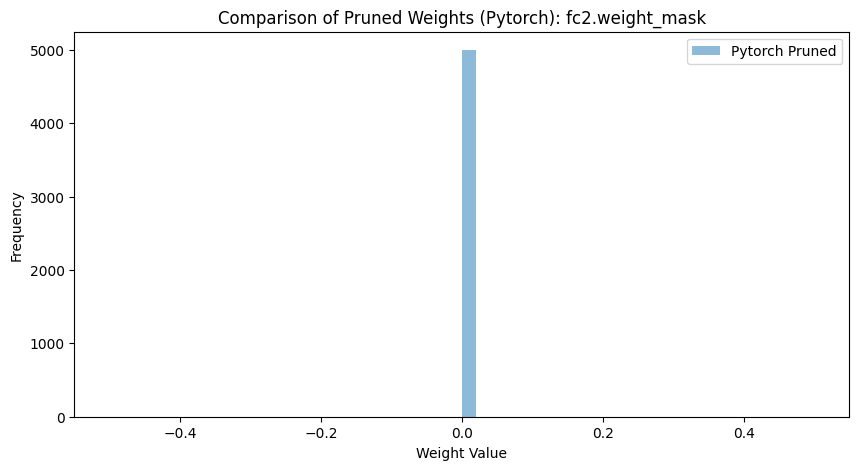

In [50]:
for keys in pytorch_final_weights.keys(): 
    plot_result(pytorch_final_weights, keys, "Pytorch")